<a href="https://colab.research.google.com/github/AdwinHR/AI-ML/blob/main/Mini_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Given a dataset regarding mall customer’s expenditure in shopping. Based on Annual Income and Spending score cluster them into a different groups.
a) .Find the number of cluster to be formed through elbow method.
b) .Show the separation of each cluster in a graph.
c) .Assume that cluster to be formed is 5, value of Annual Income  <$40 and spending score < 40$ belongs to 1 cluster. value of Annual Income  <$40 and spending score >= 70$ belongs to 2nd cluster. value of Annual Income  >=$30 & <=80 and spending score >35 & <=70$ belongs to 3rd cluster. value of Annual Income  >=$50 and spending score > 50$ belongs to 4th cluster. value of Annual Income  >=$60 and spending score < =45$ belongs to 5th cluster
Calculate accuracy between predicted output and Assumption output
Also construct a  confusion matrix
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('Mall_Customers_lyst8965.csv')
print(dataset)


     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [ ]:
X=dataset.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

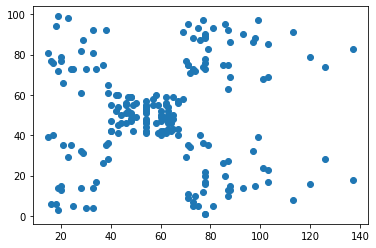

In [ ]:
from sklearn.cluster import KMeans
plt.scatter(dataset.iloc[:,3].values,dataset.iloc[:,4].values)
plt.show()

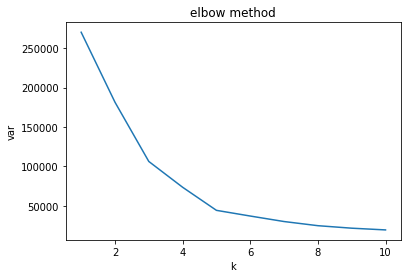

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('k')
plt.ylabel('var')
plt.show()

In [ ]:

kmeans= KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_Kmeans=kmeans.fit_predict(X)
print(Y_Kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


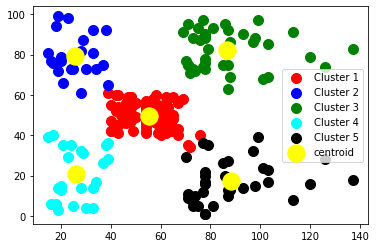

In [ ]:
plt.scatter(X[Y_Kmeans==0,0],X[Y_Kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[Y_Kmeans==1,0],X[Y_Kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[Y_Kmeans==2,0],X[Y_Kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[Y_Kmeans==3,0],X[Y_Kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[Y_Kmeans==4,0],X[Y_Kmeans==4,1],s=100,c='black',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.legend()
plt.show()

In [ ]:
p=[]
for a in range(0,len(dataset)):
    #print(dataset.iloc[a:(a+1),3].values)
    i=X[a][0]
    j=X[a][1]
    
    try:
        try:
            if i <=40 and j<=40:
                p.append(3)
                print(p[a],end=" ")
                continue
        except:
            pass
        try:
            if i<=40 and j >=70 :
                p.append(1)
                print(p[a] ,end=" ")
                continue
        except:
            pass
        try:
            if i>=35 and i<=80 and j >=35 and j<=70:
                p.append(0)
                print(p[a] ,end=" ")
                continue
        except:
            pass
        try:
            if i>=50  and j >=50 :
                p.append(2)
                print(p[a] ,end=" ")
                continue
        except:
            pass
        try:
            if i>=60  and j <=45:
                p.append(4)
                print(p[a] ,end=" ")
                continue
        except:
            pass
    except:
        p[a]=3
assumption=p

3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 0 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 

In [ ]:


from sklearn.metrics import precision_recall_fscore_support
prediction=Y_Kmeans

def accuracy_met1(actual, p):
        correct = 0
        for i in range(len(actual)):
                if actual[i] == p[i]:
                        correct += 1
        return correct / float(len(actual)) * 100.0


print(" accuracy of a model =",accuracy_met1(prediction,assumption))



 accuracy of a model = 91.5


In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(prediction,assumption)

print(cm)

[[80  0  0  0  1]
 [ 2 14  0  6  0]
 [ 0  0 39  0  0]
 [ 1  5  0 17  0]
 [ 2  0  0  0 33]]
